After determining ideal polynomial complexity, the data was narrowed down to one select make and model, namely, the Suburban 1500. The model was subsequently fit to obtain a R2 greater than 0.9 by including features of polynomial degree 2. The actual versus predicted data is then plotted on 2D and 3D plots.

In [1]:
import pickle as pkl
import scipy.stats as stats
from itertools import product
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
# from Axes3D import 

/home/chintan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/chintan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open('Data_cleaned.pkl', 'rb') as picklefile: 
    df1 = pkl.load(picklefile)

In [3]:
# Factoring for dummy variables
X1=patsy.dmatrix('Fuel',data=df1,return_type='dataframe')
X2=patsy.dmatrix('Transmission',data=df1,return_type='dataframe')
X3=patsy.dmatrix('Title',data=df1,return_type='dataframe')

In [4]:
# Adding dummy variables and removing unnecessar variables
df2=pd.merge(df1, X1,left_index=True, right_index=True)
df3=pd.merge(df2, X2,left_index=True, right_index=True)
x=pd.merge(df3, X3,left_index=True, right_index=True)
del x['Transmission']
del x['Title']
del x['Make']
del x['Model']
del x['Fuel']
del x['Price']

df1.shape

(2476, 8)

In [5]:
# Selecting entries for a specific model 'Suburban 1500'
df2=df1[df1['Model']=='Suburban 1500']
y = df2['Price']

In [6]:
# The commented below is the part of code that was used to run the regresssion with 'polynomial features' and standard scalar for many degrees with a for loop
# r2_tr_by_degree=[]
# r2_te_by_degree=[]
# sse_tr_by_degree=[]
# sse_te_by_degree=[]
# degrees=[]
deg=2
# degrees.append(deg)
x_poly_features=df2[['Odometer','Year']]
p = PolynomialFeatures(deg)
XP = p.fit_transform(x_poly_features)
new_df=pd.DataFrame(XP)
s = StandardScaler()
XS = s.fit_transform(new_df)
new_df=pd.DataFrame(XS)
indexes=list(y.index)
new_df.set_index([indexes],inplace=True)
column_names=[]
for x in range(len(new_df.columns)):
    column_names.append('X'+str(x))
new_df.columns=column_names
new_df['Price']=y
new_df=pd.merge(new_df, X1,left_index=True, right_index=True)
new_df=pd.merge(new_df, X2,left_index=True, right_index=True)
new_df=pd.merge(new_df, X3,left_index=True, right_index=True)
new_df.rename(columns={'Price':'P','Intercept_x':'IX','Fuel[T.other]':'Fuel_other','Intercept_y':'IY','Transmission[T.manual]':'Trans_manual','Intercept':'IZ','Title[T.rebuilt]':'Title_rebuilt','Title[T.salvage or missing]':'Title_sal_or_mis'},inplace=True)
lr_str='P ~ X0'
y_skl=new_df['P']
x_skl=new_df
del x_skl['P']
x_skl_train, x_skl_test, y_skl_train, y_skl_test = train_test_split(x_skl, y_skl, test_size=0.2,random_state=15)
# alphas = [1e-14, 1e-8, 1e-2, 100]
alpha=1e-8
#     sse_tr_Ridge = []
#     sse_te_Ridge = []
#     r2_tr_Ridge = []
#     r2_te_Ridge = []
# for alpha in alphas:
lr=LinearRegression()
#     lr=Ridge(alpha=alpha)
# lr=Lasso(alpha=alpha)
lr.fit(x_skl_train, y_skl_train)
lr.score(x_skl_test,y_skl_test)
# r2_tr_by_degree.append(lr.score(x_skl_train,y_skl_train))
# r2_te_by_degree.append(lr.score(x_skl_test,y_skl_test))
# sse_tr_by_degree.append(mean_squared_error(y_skl_train, lr.predict(x_skl_train)))
# sse_te_by_degree.append(mean_squared_error(y_skl_test, lr.predict(x_skl_test)))

# sse_tr_Ridge.append(mean_squared_error(y_skl_train, lr.predict(x_skl_train)))
# sse_te_Ridge.append(mean_squared_error(y_skl_test, lr.predict(x_skl_test)))
# r2_tr_Ridge.append(lr.score(x_skl_train,y_skl_train))

# r2_te_Ridge.append(lr.score(x_skl_test,y_skl_test))

0.83160167634685978

In [7]:
# Applying the model over the entire dataset after polynomial features and standard scalar, but with statsmodels
model = sm.OLS(y_skl, x_skl)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     113.2
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           1.73e-38
Time:                        07:19:54   Log-Likelihood:                -848.07
No. Observations:                  87   AIC:                             1712.
Df Residuals:                      79   BIC:                             1732.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
X0                        0          0        nan        nan           0           0
X1                 9.14e+05    1.6e+05      5.721      0.000    5.96e+05    1.23e+06
X2               -1.809e+06   1.85e+05     -9.770      0.000   -2.18e+06   -1.44e+06
X3               -5141.6715   2098.785     -2.450      0.017   -9319.199    -964.144
X4               -9.096e+05   1.58e+05     -5.750      0.000   -1.22e+06   -5.95e+05
X5                1.821e+06   1.85e+05      9.824      0.000    1.45e+06    2.19e+06
IX                7588.8940    166.527     45.572      0.000    7257.431    7920.358
Fuel_other        -733.2843   1492.267     -0.491      0.625   -3703.568    2236.999
IY                7588.8940    166.527     45.572      0.000    7257.431    7920.358
Trans_manual      1388.5053   4443.747      0.312      0.756   -7456.551    1.02e+04
IZ                7588.8940    166.527     45.572      0.000    7257.431    7920.358
Title_rebuilt             0          0        nan        nan           0           0
Title_sal_or_mis          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        1.335   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.780
Skew:                          -0.025   Prob(JB):                        0.677
Kurtosis:                       3.461   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
# generating a heatmap for p-values
fit.pvalues

X0                           NaN
X1                  1.821787e-07
X2                  3.072420e-15
X3                  1.650409e-02
X4                  1.611626e-07
X5                  2.414408e-15
IX                  1.732365e-58
Fuel_other          6.245135e-01
IY                  1.732365e-58
Trans_manual        7.555122e-01
IZ                  1.732365e-58
Title_rebuilt                NaN
Title_sal_or_mis             NaN
dtype: float64

In [9]:
p_list=list(fit.pvalues)
import math
p_list=[-math.log10(x) for x in p_list]
remove_indices=[0,6,8,10]
p_list_clean=[]
for _ in range(len(p_list)):
    if _ not in remove_indices:
        p_list_clean.append(p_list[_])
p_list_clean

[6.7395023536149665,
 14.512519380313124,
 1.7824084364438628,
 6.792735826570555,
 14.617189299142952,
 0.20445816149781293,
 0.12175853680660668,
 nan,
 nan]

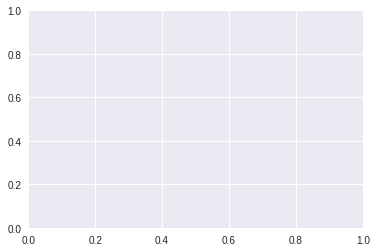

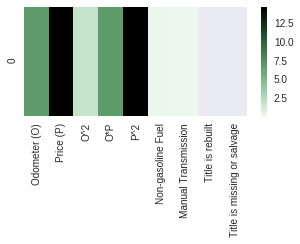

In [10]:
vec1 = np.asarray(p_list_clean)

fig, ax = plt.subplots()
# cmap = sns.cubehelix_palette(start=1.6, light=0.8, as_cmap=True, reverse=True)
fig = plt.figure(figsize=(5, 2))
cmap=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, as_cmap=True, reverse=False)
sns.set_style("darkgrid")
xticks=['Odometer (O)','Price (P)','O^2','O*P','P^2','Non-gasoline Fuel','Manual Transmission','Title is rebuilt','Title is missing or salvage']
sns.heatmap([vec1],cmap=cmap,linewidth=0, xticklabels=xticks)

In [11]:
# Function for diagnostic plot
def diagnostic_plot(x, y):
    fig = plt.figure(figsize=(12, 12))
    
    rgr = LinearRegression()
    if len(x.shape) == 1:
        x = x[:,None]
    rgr.fit(x,y)
    pred = rgr.predict(x)
    res = y - pred

    ax = fig.add_subplot(2, 2, 1)
    ax.scatter(x[:,0], y, label='truth')
    ax.scatter(x[:,0], pred, color='salmon', label='predictions')
    ax.set(title="Regression fit", 
           xlabel='x', ylabel='y')
    ax.legend(loc='best')
    
    ax = fig.add_subplot(2, 2, 2)
    ax.scatter(pred, res)
    ax.hlines([0], xmin=min(pred), xmax=max(pred), color='k')
    ax.set(title="Residual plot",
           xlabel='prediction', ylabel='residuals')
    
    ax = fig.add_subplot(2, 2, 3)
    # Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=ax)
    ax.set(title="Normal Q-Q plot")
    
    eiej = [
        ei*ej 
        for (i, ei), (j, ej) in product(enumerate(res), repeat=2)
        if i < j]
    ax = fig.add_subplot(2, 2, 4)
    ax = pd.Series(res).hist()
    ax.set(title='Histogram of Residuals',
           xlabel='Residuals'.format(np.mean(eiej)))

In [12]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

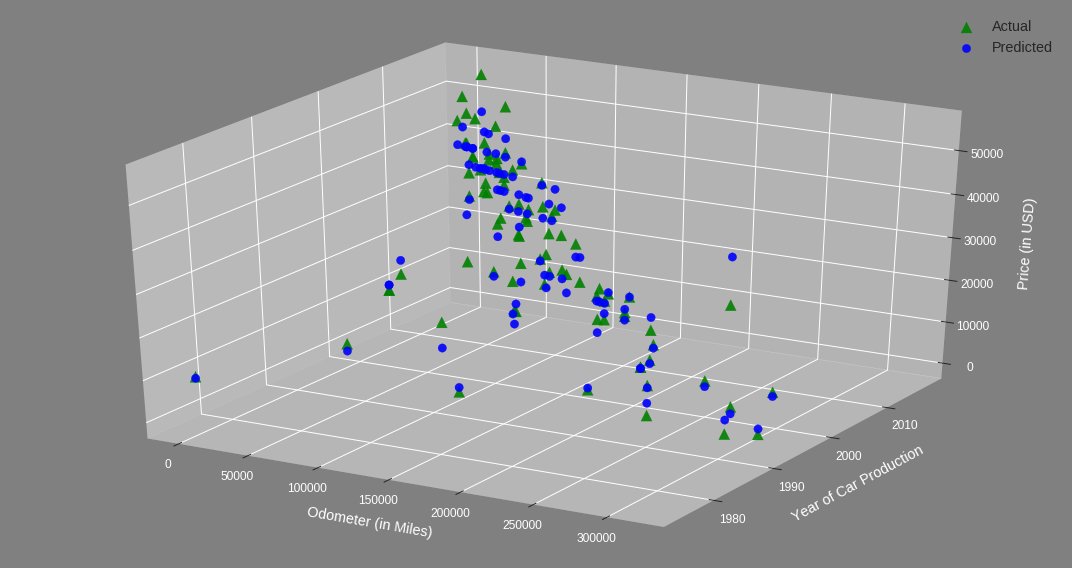

In [13]:
# 3D plot for price versus other quantiative variables (odometer and year)
fig = plt.figure(figsize=(15,8))
ax=fig.add_subplot(111,projection='3d')
ys=df2['Year']
xs=df2['Odometer']
zs=y
zs_pr=lr.predict(x_skl)
ax.scatter(xs,ys,zs,c='green',marker='^',alpha=0.9,depthshade=True,s=120,label='Actual')
ax.scatter(xs,ys,zs_pr,c='blue',marker='o',alpha=0.9,s=70,label='Predicted')
ax.set_xlabel('Odometer (in Miles)',labelpad=20)
ax.set_ylabel('Year of Car Production',labelpad=20)
ax.set_zlabel('Price (in USD)',labelpad=20)
fig.patch.set_facecolor('grey')
ax.patch.set_facecolor('grey')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')
plt.tight_layout()
plt.legend()
plt.savefig('3d_plot2.png', format='png', dpi=300,bbox_inches='tight')

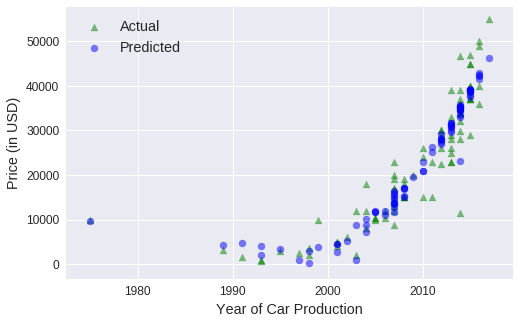

In [15]:
# Individual 2D plots - for price versus year
plt.figure(figsize=(8,5))
plt.scatter(df2['Year'],y,c='green',alpha=0.5, label='Actual', marker='^')
plt.scatter(df2['Year'],zs_pr,c='blue',alpha=0.5, label='Predicted',marker='o')
plt.ylabel('Price (in USD)',labelpad=5)
plt.xlabel('Year of Car Production',labelpad=5)
plt.plot()
plt.legend()
plt.savefig('2d_plot1.png', format='png', dpi=300,bbox_inches='tight')

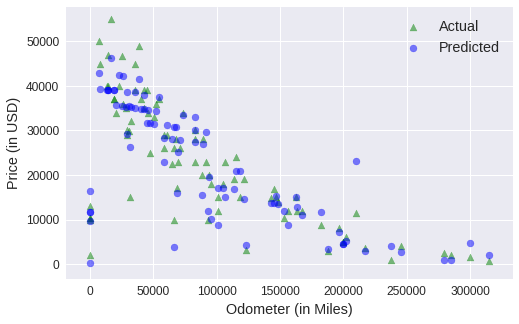

In [16]:
# Individual 2D plots - for price versus odometer
plt.figure(figsize=(8,5))
plt.scatter(df2['Odometer'],y,c='green',alpha=0.5, label='Actual', marker='^')
plt.scatter(df2['Odometer'],zs_pr,c='blue',alpha=0.5, label='Predicted',marker='o')
plt.xlabel('Odometer (in Miles)',labelpad=5)
plt.ylabel('Price (in USD)',labelpad=5)
plt.legend()
plt.plot()
plt.savefig('2d_plot2.png', format='png', dpi=300,bbox_inches='tight')

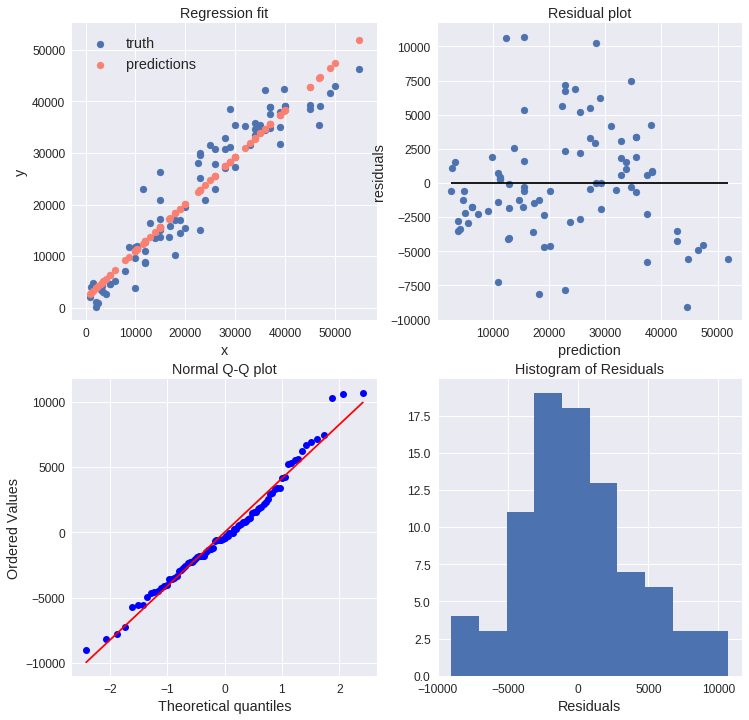

In [93]:
# Executing the diagnostic plot for the above regression model
diagnostic_plot(y,zs_pr)